Install Kaggle API

In [ ]:
!pip install kaggle


 Move the kaggle.json File to the Correct Location:

In [ ]:
import os
os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Download the Dataset Using Kaggle API

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset


Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 98% 154M/158M [00:01<00:00, 83.3MB/s]
100% 158M/158M [00:01<00:00, 97.9MB/s]


Unzip the Downloaded File

In [ ]:
!unzip covid19-image-dataset.zip


Archive:  covid19-image-dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covid1

### Approach to the problem statement

1. Load the libraries and images
2. Visualize the images
3. Declare the sequential model
4. Declare layers
      1. Convolutionals (Filter , Stride, Shape)
      2. Pooling ( Max/Avg , Stride , Shape)
      3 . Flatten
      4. Dense layer ( number of neurons , activation )
      5 . Output layer ( activation , output shape )
5. Compile the model (Optimizer , Loss , Metrics )
6. FIt the model (  Dataset , Epochs , Batch size )
7. Model evaluation

Load the libraries and images

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
train_dir = '/content/Covid19-dataset/train'
val_dir = '/content/Covid19-dataset/test'

In [ ]:
train_dataset = image_dataset_from_directory(train_dir , batch_size = 64 , class_names=['Covid','Normal','Viral Pneumonia'], image_size = (160,160), seed = 123)
val_dataset = image_dataset_from_directory(val_dir , batch_size = 64 , class_names = ['Covid','Normal','Viral Pneumonia'] , image_size =(160,160), seed = 123)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
train_dataset.class_names

['Covid', 'Normal', 'Viral Pneumonia']

Visualize the images

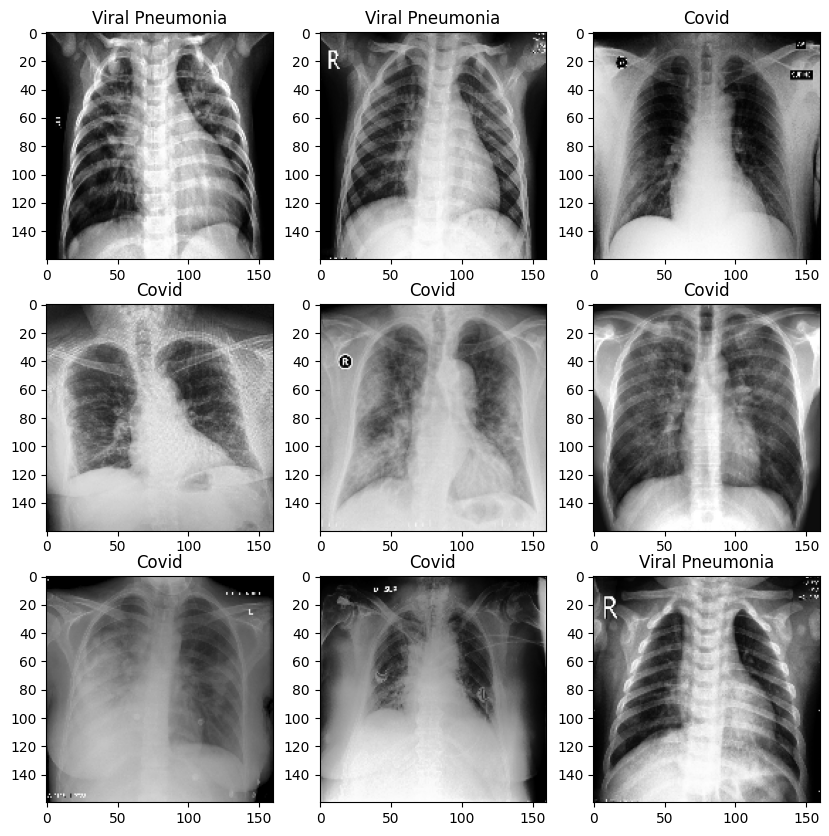

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

Declare a model

In [ ]:
model = Sequential()
#Block 1
model.add(Conv2D(128 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
#Block 2
model.add(Conv2D(256 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
#Block 3
model.add(Conv2D(512 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
#Block 4
model.add(Conv2D(1024 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
#Block 5
model.add(Conv2D(2048 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
#Block 6
model.add(Conv2D(4096 , 3 , padding = 'same' , activation = 'relu' , input_shape = (160,160,3)))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
######################## Classification Layer ############################################
model.add(Flatten())
model.add(Dense(1024 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation = 'softmax')) # Multiclass problem

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 160, 160, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 80, 80, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 80, 80, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 40, 40, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 40, 40, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 20, 20, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 2048)        │      18,876,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 4096)          │      75,501,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 4096)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,357,827 (447.68 MB)

 Trainable params: 117,357,827 (447.68 MB)

 Non-trainable params: 0 (0.00 B)

Compile The model

In [ ]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

Fit the model

In [ ]:
hist = model.fit(train_dataset , epochs = 100 , validation_data = val_dataset , batch_size = 32)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
y_hat_train = model.predict(train_dataset)
y_hat_val = model.predict(val_dataset)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
def model_eval(actual,predicted):
    conf_matrix = confusion_matrix(actual,predicted)
    class_report = classification_report(actual,predicted)
    acc_score = accuracy_score(actual,predicted)
    print(round(acc_score,2))
    print(class_report)
    print(conf_matrix)


In [ ]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])


In [ ]:
y_true_val = np.array([label.numpy() for _, labels in val_dataset for label in labels])

In [ ]:
model_eval(y_true_train,y_hat_train.round())

In [ ]:
model_eval(y_true_val,y_hat_val.round())